# Data import
Import features and targets from CSVs

In [1]:
import pandas as pd
data_dir = "C:/Users/kolar/Documents/GitHub/microbiome_glove_embedding/data/"

print("Importing data...")
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')
print('Done.\n')
print('The shape of the feature data is: ' + str(X.shape))
print('The shape of the target data is: ' + str(y.shape))


Importing data...
Done.

The shape of the feature data is: (5874, 112)
The shape of the target data is: (5874, 1)


# UMAP Projection Setup

In [6]:
import umap
import warnings
warnings.filterwarnings('ignore')

n_neighbors = 5
min_dist = 0.10
n_components_2d = 2
n_components_3d = 3

# 2D UMAP Projection

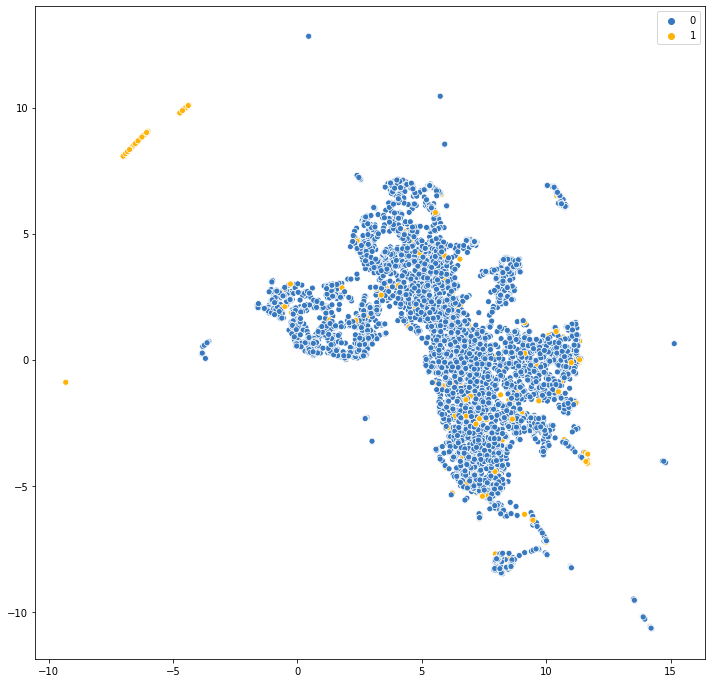

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as numpy
%matplotlib inline

reducer = umap.UMAP(
    n_neighbors = n_neighbors,
    min_dist = min_dist,
    n_components = n_components_2d)

embedding = reducer.fit_transform(X)
y1 = y.to_numpy()
y2 = y1.transpose()
plt.figure(figsize=(12,12))
# plt.scatter(embedding[:, 0], embedding[:, 1], 
#             c=y.iloc[:, 0], 
#             alpha=0.80, 
#             s=10)
sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=y2[0], palette=sns.xkcd_palette(["windows blue","amber"]))
# plt.title('2D UMAP Projection of Embedded Data', fontsize=24)
# plt.show()

# 3D UMAP Projection

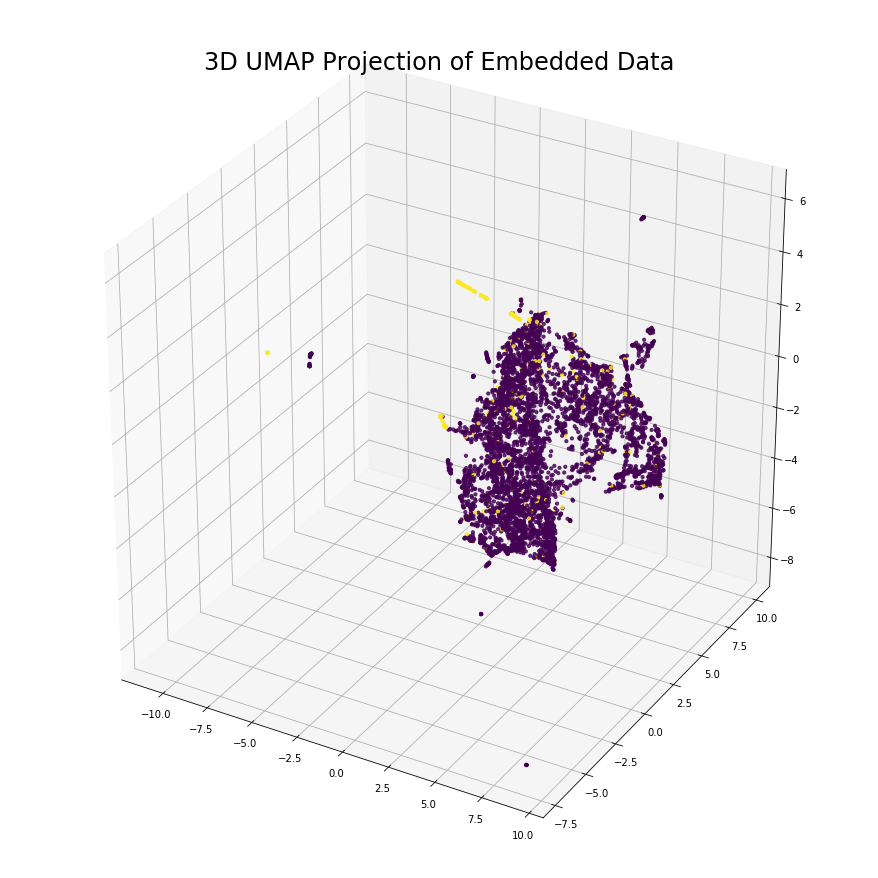

In [4]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

reducer = umap.UMAP(
    n_neighbors = n_neighbors,
    min_dist = min_dist,
    n_components = n_components_3d)

embedding = reducer.fit_transform(X)

plt = pyplot.figure(figsize=(12, 12))
ax = Axes3D(plt)
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2],
           c=y.iloc[:, 0],
           alpha=0.80,
           s=10)
ax.set_title('3D UMAP Projection of Embedded Data', fontsize=24)
plt.show()

# Split Data and Import Helper Functions

In [2]:
import helper_functions as hf
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Logistic Regression

C:\Users\kolar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kolar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
The score of Logistic Regression is0.9625595643294759
f10.4761904761904761
[[1389    6]
 [  49   25]]


Text(0.5, 1, 'Accuracy Score: 0.9625595643294759')

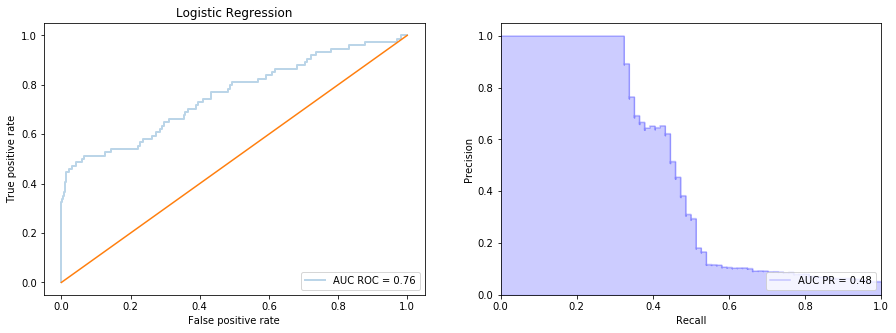

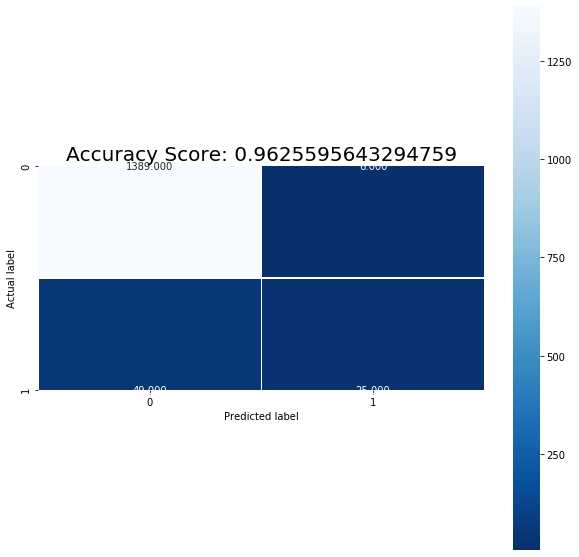

In [3]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
model = logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)

print('The score of Logistic Regression is' + str(score))

f = plt.figure(figsize=(15,5))
roc_auc, fpr, tpr, average_precision, f1, f2 = hf.computeMLstats(model, X_test, y_test, plot=True, plot_pr=True, graph_title = "Logistic Regression", flipped = False)

print('f1' + str(f1))
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 20)
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

# SVM

C:\Users\kolar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
The score of SVM is0.9659632402995235
f10.489795918367347
[[1395    0]
 [  50   24]]


Text(0.5, 1, 'Accuracy Score: 0.9659632402995235')

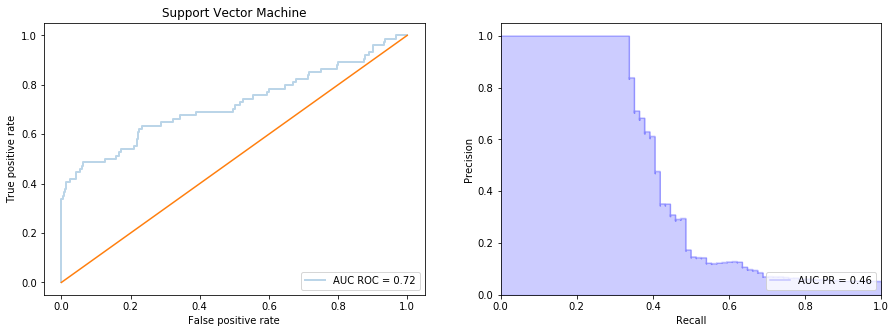

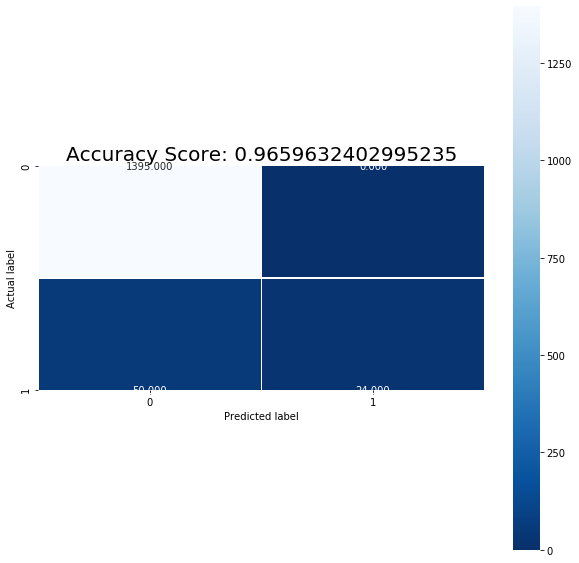

In [3]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
model = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
score = metrics.accuracy_score(y_test, y_pred)


print(type(y_pred))
